<a href="https://colab.research.google.com/github/TosinFrancis/Gomycode_Project/blob/main/MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```
<h1>LINEAR REGRESSION<h1>
<h2>Assumptions Of Linear Regression:<h2>

<p><b>Linear relationship:<b> There must be relationship between the dependent and the independent variable. That is, a change one variable must at minimal afffect another.<p>
<p><b>Normality:<b> There must be normality in the residuals. The residual is the difference between the observed value and the predicted values.<p>
<p>No Multicollinearity: This occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model. The independent variables must not be correlated with each other.<p>
<p><b>No auto-correlation:<b> This defines how data points in the past relates, on average, to its preceding data points. This must be removed before Linear Regression<p>
<p><b>Homoscedasticity:<b> This, also known as constant variance, states that dispersion of residuals(difference between actual and predicted value) should be roughly the same along the regression line.<p>

<h2>STEPS TO LINEAR REGRESSION<h2>
<b>Fetch the Data<b>
<p>Clean the data according to their data types<p>
Preprocess the data: Label/Binary encode the categorical variables, Changing of Datatype from string type to integer ( as the case might be, etc)
Normalize the data: Ensure the dataset is normally distributed. You can check for normalization using the histogram plot, then normalize left or right skewed features
Linear Relationship: using the scatterplot, check if there is a linear relationship between the independent variable and the dependent variable. If there be none, drop the variable, or use Logarithmic transformation, or use polynomial regression
The observations should be independent of each other (that is, there should be no dependency). (No Transitive Dependency of 3rd Normal Forms, remember?)
Treat all outliers
Train the model: Use the training data to fit the linear regression model. The model will find the coefficients (weights) that minimize the residual sum of squares between the observed and predicted values.
Evaluate the model. Check the performance of the model using metrics such as R-squared, mean absolute error, and root mean squared error.
Use the trained model to make predictions for new, unseen data points.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')

In [ ]:
dx = data.copy()

In [ ]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#check for missing data
dx.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64



```
# Profit = bo + b1(R&D) + b2(
```



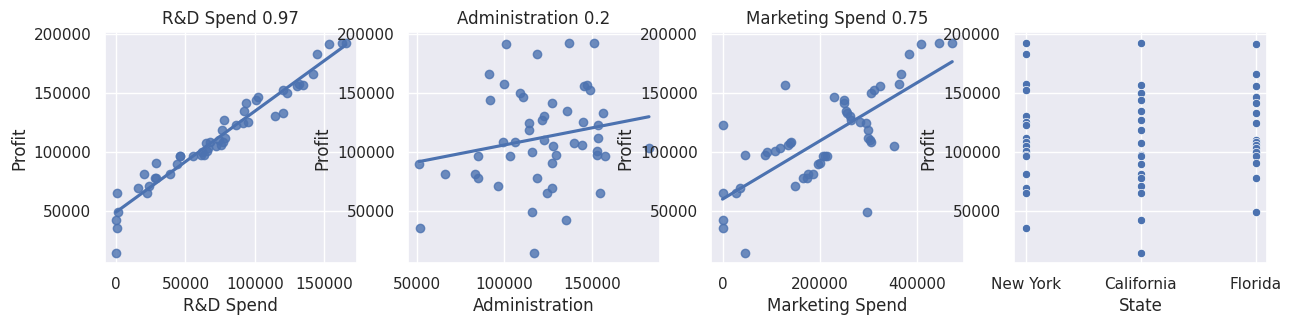

In [ ]:
# Check For Linearity (regplot)
def linearityChecker(dataframe, a,b,c,d):
    plt.figure(figsize = (15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.regplot(x = dataframe[a], y = dataframe['Profit'], ci = 0)
    plt.title(f"{a} {dataframe['Profit'].corr(dataframe[a]).round(2)}")

    plt.subplot(1, 4, 2)
    sns.regplot(x = dataframe[b], y = dataframe['Profit'], ci = 0)
    plt.title(f"{b} {dataframe['Profit'].corr(dataframe[b]).round(2)}")

    plt.subplot(1, 4, 3)
    sns.regplot(x = dataframe[c], y = dataframe['Profit'], ci = 0)
    plt.title(f"{c} {dataframe['Profit'].corr(dataframe[c]).round(2)}")

    plt.subplot(1, 4, 4)
    sns.scatterplot(x = dataframe[d], y = dataframe['Profit'])
    # plt.title(dataframe['Profit'].corr(dataframe[d]))

linearityChecker(dx, 'R&D Spend', 'Administration', 'Marketing Spend', 'State')

<Axes: >

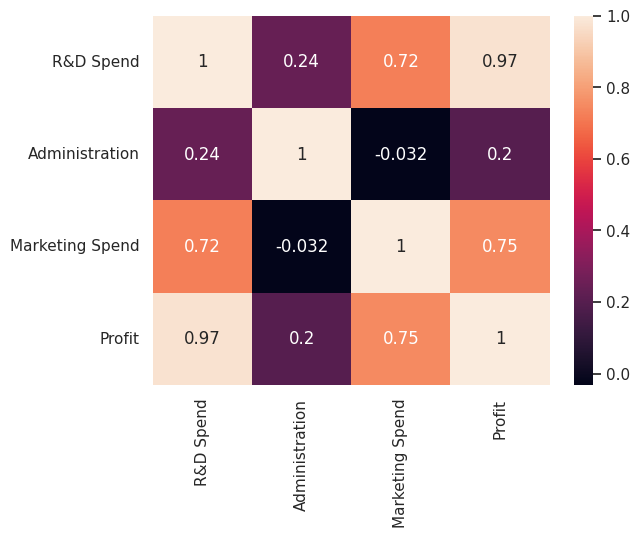

In [ ]:
#check for linearity and Normality
sns.heatmap(data.corr(), annot = True)

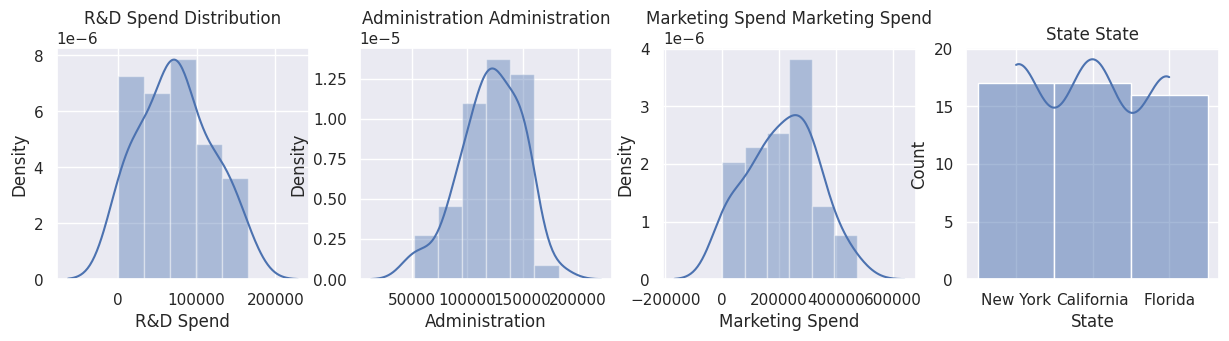

In [ ]:
#check for Normality(Distplot: Univariate)
def Normalitychecker(dataframe, a, b, c, d):
    plt.figure(figsize = (15, 3))
    sns.set(style= 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.distplot(dataframe[a])
    plt.title(f'{a} Distribution')

    plt.subplot(1, 4, 2)
    sns.distplot(dataframe[b])
    plt.title(f'{b} Administration')

    plt.subplot(1, 4, 3)
    sns.distplot(dataframe[c])
    plt.title(f'{c} Marketing Spend')

    plt.subplot(1, 4, 4)
    sns.histplot(x = dataframe[d], kde = True)
    plt.title(f'{d} State')


Normalitychecker(dx, 'R&D Spend', 'Administration', 'Marketing Spend', 'State' )

In [ ]:
dx = dx.drop('State', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x = dx.drop('Profit', axis = 1)
y = dx.Profit

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80)
print(f'x_train {xtrain.shape}')
print(f'x_test {xtest.shape}')
print(f'y_train {ytrain.shape}')
print(f'y_test {xtest.shape}')

x_train (40, 3)
x_test (10, 3)
y_train (40,)
y_test (10, 3)


In [ ]:
train_set = pd.concat([xtrain, ytrain], axis = 1 )
test_set = pd.concat([xtest, ytest], axis = 1)

print(f"\t\t\tTrain Set")
display(train_set.head())
print(f"\n\t\t\tTtest Set")
display(test_set.head())

			Train Set


,R&D Spend,Administration,Marketing Spend,Profit
20,76253.86,113867.30,298664.47,118474.03
7,130298.13,145530.06,323876.68,155752.60
1,162597.70,151377.59,443898.53,191792.06
48,542.05,51743.15,0.00,35673.41
42,23640.93,96189.63,148001.11,71498.49



			Ttest Set


,R&D Spend,Administration,Marketing Spend,Profit
44,22177.74,154806.14,28334.72,65200.33
32,63408.86,129219.61,46085.25,97427.84
30,61994.48,115641.28,91131.24,99937.59
12,93863.75,127320.38,249839.44,141585.52
31,61136.38,152701.92,88218.23,97483.56


In [ ]:
#modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()

lin_reg.fit(xtrain, ytrain)
train_validation = lin_reg.predict(xtrain)
val_score = r2_score(ytrain, train_validation)

print(f"Accuracy Score on Training is: {val_score.round(2)}")

Accuracy Score on Training is: 0.95


In [ ]:
test_prediction = lin_reg.predict(xtest)
test_val_score = r2_score(ytest, test_prediction)

print(f"Accuracy Score on Testing is: {test_val_score.round(2)}")

Accuracy Score on Testing is: 0.92


In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.80842534 -0.00393961  0.03750229]
44545.789053981585


```
Profit = 44545 + 0.80842534(R&D Spending) - 0.00393961(Administrative Expense) + 0.03750229(Marketting Expense)
```
<b> A 1% increase in R&D Spending increases profit by 0.80<b><br>
<b> A 1% increase in Administrative Expense decreases profit by 0.003<b><br>
<b> A 1% increase in Marketting Expense increase profit by 0.003<b><br>

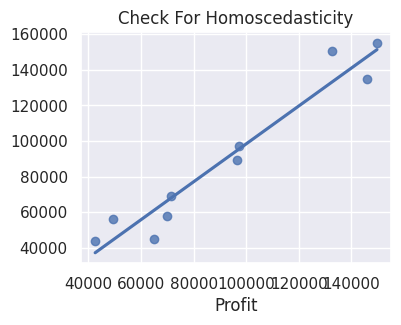

In [ ]:
# Test For Homoscedasticity
plt.figure(figsize = (4, 3))
sns.regplot(x = ytest, y = test_prediction, ci = 0)
plt.title('Check For Homoscedasticity')
plt.xlabel = ('Predicted')
plt.ylabel = ('Actual')

<Axes: ylabel='Count'>

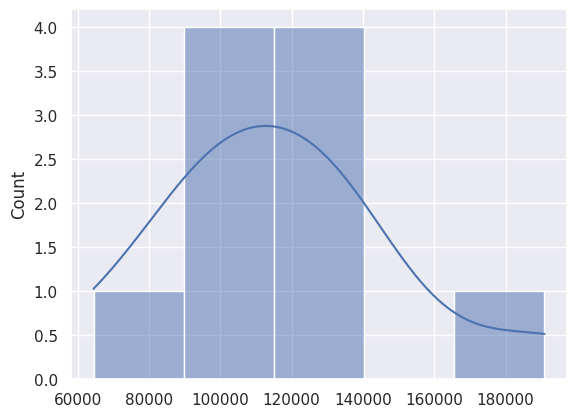

In [ ]:
# Test For Normality of Residuals
sns.histplot(x = test_prediction, kde = True)

In [ ]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [ ]:
heart = pd.read_csv('/content/heart.data.csv')
heart.head(3)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     498 non-null    int64  
 1   biking         498 non-null    float64
 2   smoking        498 non-null    float64
 3   heart.disease  498 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.7 KB


In [ ]:
heart.isnull().sum()

Unnamed: 0       0
biking           0
smoking          0
heart.disease    0
dtype: int64

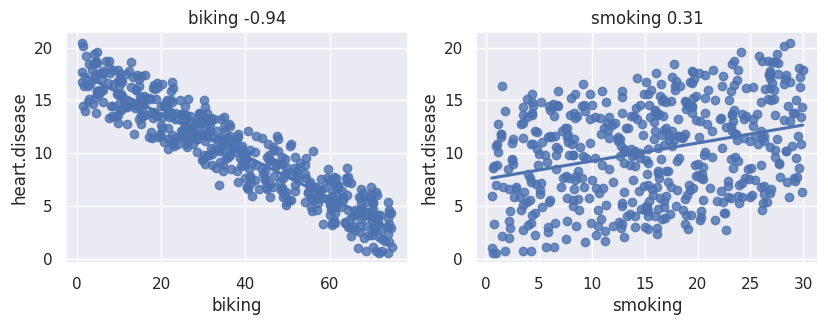

In [ ]:
#...........CHECK FOR LINEARITY
def linearity_Checker (df, a, b):

    plt.figure(figsize = (15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.regplot(x = df[a], y = df['heart.disease'], ci = 0)
    plt.title(f"{a} {df[a].corr(df['heart.disease']).round(2)}")

    plt.subplot(1, 3, 2)
    sns.regplot(x = df[b], y = df['heart.disease'], ci = 0)
    plt.title(f"{b} {df[b].corr(df['heart.disease']).round(2)}")

linearity_Checker (heart, 'biking', 'smoking')

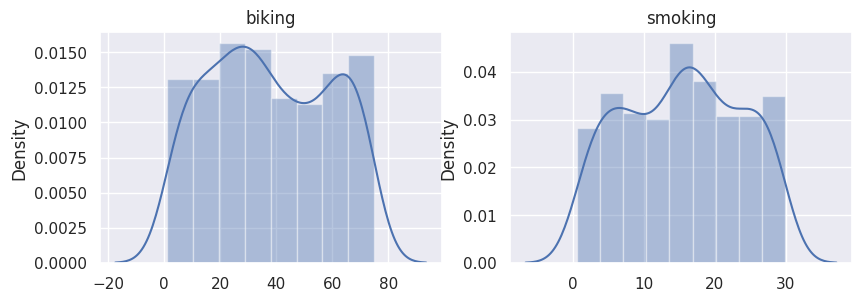

In [ ]:
#.................check for Normality

def Normality_Checker (df, a, b):

    plt.figure(figsize = (15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.distplot(x = df[a])
    plt.title(f"{a}")

    plt.subplot(1, 3, 2)
    sns.distplot(x = df[b])
    plt.title(f"{b}")

Normality_Checker (heart, 'biking', 'smoking')

In [ ]:
X = heart[['biking', 'smoking']]
y = heart['heart.disease']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.80 )
print(f'x_train {xtrain.shape}')
print(f'x_test {xtest.shape}')
print(f'y_train {ytrain.shape}')
print(f'y_test {xtest.shape}')

x_train (398, 2)
x_test (100, 2)
y_train (398,)
y_test (100, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)
train_validation = lin_reg.predict(xtrain)
val_score = r2_score(ytrain, train_validation)
print(f"Accuracy Score on Training is: {val_score.round(2)}")

Accuracy Score on Training is: 0.98


In [ ]:
test_prediction = lin_reg.predict(xtest)
pred_score = r2_score(ytest, test_prediction)
print(f"Accuracy Score on Training is: {pred_score.round(2)}")

Accuracy Score on Training is: 0.98


In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-0.20014447  0.17699834]
15.0039811782351




```
heart disease = 15 -0.20014447(biking) + 0.17699834(smoking)
```
<b> A 1% increase in biking decreases heart disease by 0.20<b><br>
<b> A 1% increase in smoking increases the chances of heart disease by 0.17<b><br>



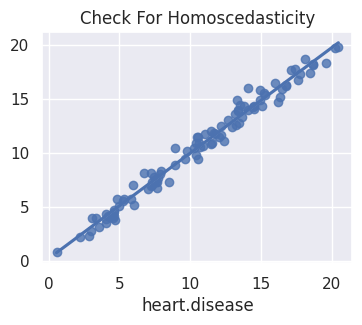

In [ ]:
# Test For Homoscedasticity
plt.figure(figsize = (4, 3))
sns.regplot(x = ytest, y = test_prediction, ci = 0)
plt.title('Check For Homoscedasticity')
plt.xlabel = ('Predicted')
plt.ylabel = ('Actual')

<Axes: ylabel='Count'>

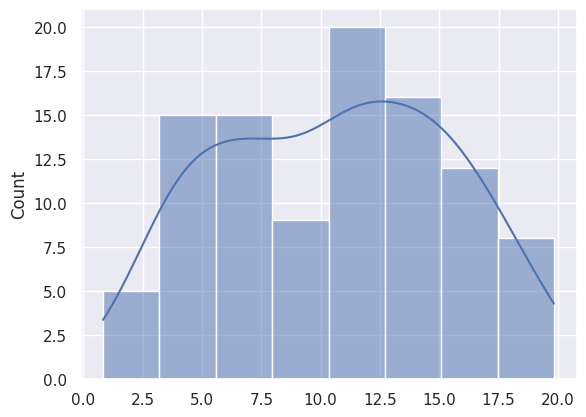

In [ ]:
# Test For Normality of Residuals
sns.histplot(x = test_prediction, kde = True)


<h1><b>LOGISTIC REGRESSION<b> <h1>
<ol>
<li> Import Data </li>
<li> Clean Data</li>
<li> Transorm Data</li>
<li> Feature Selection or Engineering: with select k-best and XGBOOST</li>
<li> Modelling</li>
</ol>

Select K best is selecting a best number based on the programmer discretion



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Loan_Data.csv')

In [ ]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#split data to test and train and save differently

train = data.sample(564)
test = data.sample(50)

test.to_csv('LoanTestData')

In [ ]:
train.reset_index(drop = True, inplace =True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002110,Male,Yes,1,Graduate,NaN,5250,688.0,160.0,360.0,1.0,Rural,Y
1,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
2,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
3,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
4,LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,Y




<H1> CLASSIFICATION PROBLEMS<H1>
<H2> LOGISTICS REGRESSION<H2>
<p><b>Label<b> encoding for nominal data(yes and no or male and female)
Ordinal encoding for data with hireachy<p>

Scaling is design for the purpose to bring two extreme number close together, while maintaing the distance between its datapoint

There are two types of Scaling

1.Normalization:it nomalization when the numerical values are scaled so that they have the minimum of 0 and maximum of 1.
2. Standardization:  it is standardization when the numerical value are scled so that they have the mean of 0 and standard deviation of 1

it is good practice that you dont scale a categorical columns that has been converted to numerical. standard scale before converting categorical to numerical.

it also good practise to scale everything before label encoding

```
`# This is formatted as code`
```

Feature selection helps to find the most important columns


Binary classification 2 or 1 outcome
Multiclass Classification for more than 2 outcome

Polynomial Regression: Not all regression can be captured linearly. if all the variables does not have the ability to predict a target the variable


Strafication is used for equal selection with train and test datasets
Stratify K-Fold


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [ ]:
def cleaner(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum()/len(dataframe)*100) > 30:
            dataframe[i].drop(i, axis = 1, inplace =True)

        #Replace numerical missing data with median
        elif dataframe[i].dtypes == 'int' or dataframe[i].dtype == 'float':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

        #Replace numerical missing data with mode
        elif dataframe[i].dtypes == 'O':
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)

cleaner(train)
train.isnull().sum().sort_values(ascending = False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#------------------TRANSFORM DATA-------------
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
normalizer = MinMaxScaler()

for i in train.columns:
    if train[i].dtypes == 'int' or train[i].dtypes == 'float':
        #scaling must be done with 2d
        train[[i]] = scaler.fit_transform(train[[i]])

train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002110,Male,Yes,1,Graduate,No,-0.004688,-0.344876,0.174986,0.283671,0.41833,Rural,Y
1,LP002424,Male,Yes,0,Graduate,No,0.342165,2.495007,0.354775,-0.689506,0.41833,Rural,Y
2,LP001570,Male,Yes,2,Graduate,No,-0.185024,-0.062930,0.151014,0.283671,0.41833,Rural,Y
3,LP001206,Male,Yes,3+,Graduate,No,-0.374519,-0.600446,-0.556156,0.283671,0.41833,Urban,Y
4,LP002219,Male,Yes,3+,Graduate,No,0.578117,1.255414,-0.184592,0.283671,0.41833,Rural,Y


In [ ]:
#LABEL ENCODER TO CONVERT CATEGORICAL TO NUMERICAL
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in train.columns:
    if train[i].dtypes == 'O':
        train[i] = lb.fit_transform(train[i])

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,306,1,1,1,0,0,-0.004688,-0.344876,0.174986,0.283671,0.41833,0,1
1,406,1,1,0,0,0,0.342165,2.495007,0.354775,-0.689506,0.41833,0,1
2,150,1,1,2,0,0,-0.185024,-0.062930,0.151014,0.283671,0.41833,0,1
3,56,1,1,3,0,0,-0.374519,-0.600446,-0.556156,0.283671,0.41833,2,1
4,344,1,1,3,0,0,0.578117,1.255414,-0.184592,0.283671,0.41833,0,1


In [ ]:
# ANOVA F-value between label/feature

x = train.drop('Loan_Status', axis = 1) # --------------------------------- Define the Independent Variables
y = train.Loan_Status # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
10,Credit_History,232.576518
4,Education,5.327035
2,Married,3.460677
7,CoapplicantIncome,1.427420
11,Property_Area,0.676124
8,LoanAmount,0.659428
5,Self_Employed,0.637162
0,Loan_ID,0.186354
1,Gender,0.122154
6,ApplicantIncome,0.087638


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

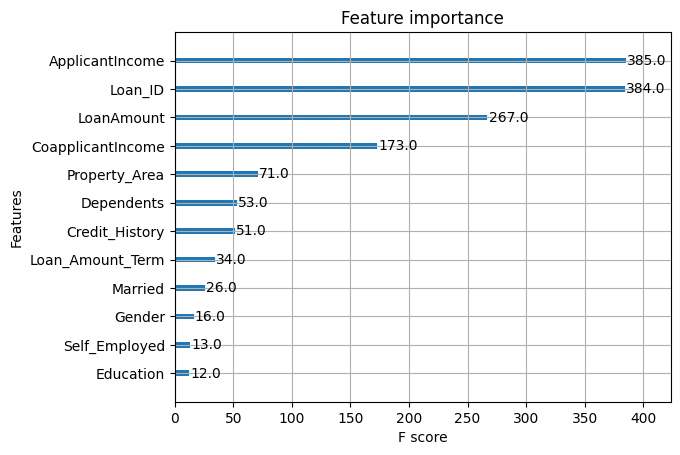

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area', 'Credit_History', 'Education', 'Dependents']

In [ ]:
x = train[sel_cols]
y = train.Loan_Status

x.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Credit_History,Education,Dependents
0,-0.004688,0.174986,-0.344876,0,0.41833,0,1
1,0.342165,0.354775,2.495007,0,0.41833,0,0
2,-0.185024,0.151014,-0.062930,0,0.41833,0,2
3,-0.374519,-0.556156,-0.600446,2,0.41833,0,3
4,0.578117,-0.184592,1.255414,0,0.41833,0,3


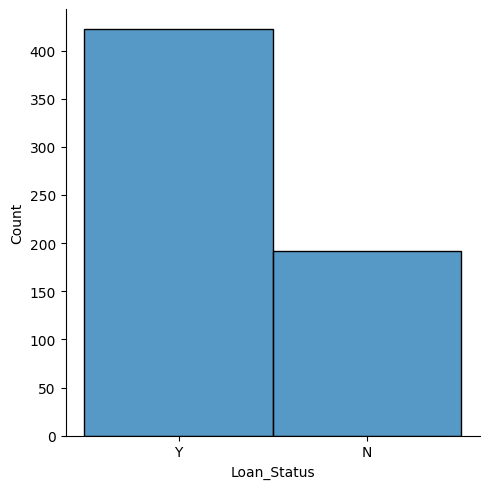

In [ ]:
# Checking the distribution of the Dependent Variable for imbalance
# Alternative method to solve for imbalance is to use SMOTE techniques
sns.displot(data.Loan_Status)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

              precision    recall  f1-score   support

           0       0.44      0.89      0.59        71
           1       0.97      0.79      0.87       380

    accuracy                           0.81       451
   macro avg       0.71      0.84      0.73       451
weighted avg       0.89      0.81      0.83       451



<Axes: >

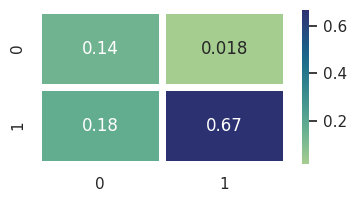

In [ ]:
#classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
train_pred = log_reg.predict(xtrain)
print(classification_report(train_pred, ytrain))

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

In [ ]:
confusion_matrix(train_pred, ytrain)

array([[ 63,   8],
       [ 79, 301]])

              precision    recall  f1-score   support

           0       0.39      0.93      0.55        15
           1       0.99      0.78      0.87        98

    accuracy                           0.80       113
   macro avg       0.69      0.85      0.71       113
weighted avg       0.91      0.80      0.83       113



<Axes: >

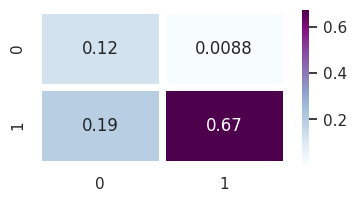

In [ ]:
#tryimg on the test data
test_pred = log_reg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer_ = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer_/np.sum(revealer_), annot = True, cmap = 'BuPu', linewidth = 5)

In [ ]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/LoanTestData')
cleaner(test_data)
test_data.head(2)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
1,550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,120.0,360.0,0.0,Rural,N


In [ ]:
for i in test_data.columns:
    if test_data[i].dtypes == 'int' or test_data[i].dtypes == 'float':
        test_data[[i]] = scaler.fit_transform(test_data[[i]])

for i in test_data.columns:
    if test_data[i].dtypes == 'O':
        test_data[i] = lb.fit_transform(test_data[i])

test_data.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.494530,31,1,1,0,0,0,1.853712,2.353227,3.503996,0.242536,0.333333,0,0
1,1.451447,43,1,1,2,0,1,0.071328,-0.816804,-0.361843,0.242536,-3.000000,0,0
2,-0.980496,10,1,1,0,0,0,-0.428806,0.928941,-0.267344,0.242536,0.333333,1,1
3,-0.816604,13,0,0,0,0,0,-0.264409,-0.816804,-1.014740,0.242536,0.333333,1,1
4,0.557972,33,1,0,0,0,0,-0.022847,1.730779,1.150130,0.242536,0.333333,1,1


In [ ]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area', 'Credit_History', 'Education', 'Dependents']
test_data_x = test_data[sel_cols]
test_data_y = test_data['Loan_Status']

              precision    recall  f1-score   support

           0       0.31      1.00      0.48         5
           1       1.00      0.76      0.86        45

    accuracy                           0.78        50
   macro avg       0.66      0.88      0.67        50
weighted avg       0.93      0.78      0.82        50



<Axes: >

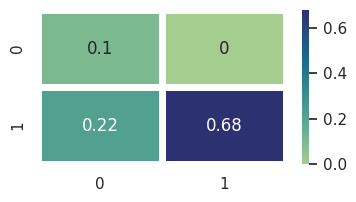

In [ ]:
new_pred = log_reg.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidths= 5)

In [ ]:
import pickle

# save model
pickle.dump(new_pred, open('Loan1_Model.pkl', "wb"))

# # load model
# loaded_model = pickle.load(open(filename, "rb"))

<h2><b>ANOTHER MACHINE LEARNING CLASSIFICATION EXAMPLE</b></h2><hr>
Identifying and predicting customer churn is a critical challenge for banks seeking to retain and enhance customer relationships. Developing an accurate machine learning model to predict churn and proactively address it can help mitigate revenue loss, improve customer retention strategies, and optimize overall business performance.<br>
Hence, the aim of this project is to develop a machine learning model to predict churning of a customer.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bank = pd.read_csv('/content/BankChurners.csv')

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
new_bank = bank.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',  axis = 1, inplace = True)

In [ ]:
new_bank = bank.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',  axis = 1)

In [ ]:
cat = new_bank.select_dtypes(include = ['category', 'object'])
num = new_bank.select_dtypes(include = 'number')

display(cat.head())
display(num.head())

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


In [ ]:
new_bank.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057


In [ ]:
new_bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Edu_level1                  0
Edu_level2                  0
dtype: int64

In [ ]:
#split data to test and train and save differently

train = new_bank.sample(10000)
test = new_bank.sample(1027)

test.to_csv('BankTestData')

In [ ]:
train.Attrition_Flag.value_counts()

Existing Customer    8392
Attrited Customer    1608
Name: Attrition_Flag, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
normalizer = MinMaxScaler()

for i in new_bank.columns:
    if train[i].dtypes == 'int' or train[i].dtypes == 'float':
        train[[i]] = scaler.fit_transform(train[[i]])

train.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
5980,-0.796192,Existing Customer,-0.666639,M,2.044393,Graduate,Married,$60K - $80K,Blue,0.008116,...,0.493061,-0.446579,0.222647,-0.46651,-1.370386,0.094425,-0.036953,-0.635503,0.070224,-0.437204
7407,-0.635557,Existing Customer,0.082267,M,2.044393,Graduate,Single,$60K - $80K,Blue,0.008116,...,-0.411638,-0.650820,0.124531,-0.66191,0.162671,0.044707,0.261224,1.094184,0.690615,-0.437728


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in train.columns:
    if train[i].dtypes == 'O':
        train[i] = lb.fit_transform(train[i])

train.head(6)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
5980,-0.796192,1,-0.666639,1,2.044393,2,1,2,0,0.008116,...,0.493061,-0.446579,0.222647,-0.466510,-1.370386,0.094425,-0.036953,-0.635503,0.070224,-0.437204
7407,-0.635557,1,0.082267,1,2.044393,2,2,2,0,0.008116,...,-0.411638,-0.650820,0.124531,-0.661910,0.162671,0.044707,0.261224,1.094184,0.690615,-0.437728
4553,-0.559959,1,0.331903,0,-0.266526,0,1,4,0,-0.117129,...,1.397761,-0.588908,0.850588,-0.665214,1.563410,0.027350,-0.036953,0.492371,1.053418,-0.436864
3433,-0.514986,1,-0.541821,1,0.503780,3,1,3,0,0.008116,...,-0.411638,1.707205,-0.263025,1.730582,-0.658609,-0.312732,-0.548111,-0.147319,-0.854922,-0.437922
4217,-0.594254,0,-0.541821,1,0.503780,2,1,2,0,-0.743351,...,0.493061,-0.366931,-1.425696,-0.238837,0.440994,-0.580738,-1.187060,-0.715464,-0.996415,2.284731
2471,0.869768,1,0.955991,0,-1.036832,2,1,4,0,0.634338,...,1.397761,-0.437435,-0.704546,-0.374097,0.436431,-0.898462,-1.485236,3.316264,-0.539284,-0.437398


In [ ]:
# ANOVA F-value between label/feature

x = train.drop('Attrition_Flag', axis = 1) # --------------------------------- Define the Independent Variables
y = train.Attrition_Flag # --------------------------------------------------- Define the dependent Variable


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
20,Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...,4.424544e+08
17,Total_Trans_Ct,1.599191e+03
18,Total_Ct_Chng_Q4_Q1,9.092179e+02
13,Total_Revolving_Bal,7.487204e+02
11,Contacts_Count_12_mon,4.363715e+02
19,Avg_Utilization_Ratio,3.309864e+02
16,Total_Trans_Amt,2.912647e+02
10,Months_Inactive_12_mon,2.357591e+02
9,Total_Relationship_Count,2.317038e+02
15,Total_Amt_Chng_Q4_Q1,1.695272e+02


In [ ]:
x

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Edu_level1,Edu_level2
8886,0.851261,-0.749481,0,0.527831,1,1,4,0,-0.832588,-1.807512,...,-0.454601,0.776774,-0.524552,1.115323,1.206534,0.803482,-0.286549,0.424393,-0.440059,0.440058
2347,-0.613924,1.364886,1,-1.036113,6,1,0,0,0.030070,1.474100,...,1.620914,0.925408,1.539313,-1.315328,-0.831185,-0.937495,0.012268,-0.706899,-0.439276,0.439267
8324,-0.541407,0.991762,0,0.527831,2,2,4,0,0.030070,-1.807512,...,-0.652547,0.698227,-0.715620,0.525147,0.121405,0.378854,0.941466,1.263856,-0.439888,0.439895
3543,-0.542145,-0.500732,0,2.091776,2,2,4,0,0.030070,0.161455,...,-0.043132,-0.240703,-0.021603,-0.720780,-0.061640,1.143185,0.503474,-0.577197,-0.439875,0.439867
18,1.768141,1.862384,1,-1.036113,3,1,1,0,2.494806,-1.151189,...,-0.613282,1.590031,-0.756216,4.669495,-0.905629,-1.489512,1.743770,1.836708,-0.439719,0.439731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,-0.802553,0.743013,0,1.309803,2,1,4,0,0.030070,1.474100,...,-0.461956,1.590031,-0.604768,-0.834443,-0.866510,-1.362124,0.081855,0.972025,-0.440038,0.440031
5419,-0.644983,0.867388,0,0.527831,5,1,1,0,0.769490,1.474100,...,-0.710633,0.312746,-0.739220,-0.458479,-0.000625,0.378854,-0.716355,1.292679,-0.440035,0.440031
2161,-0.705522,-1.371354,1,0.527831,5,1,1,0,0.030070,1.474100,...,-0.019551,0.538718,-0.067828,0.909855,-0.772506,-1.234735,0.339739,-0.317792,-0.438551,0.438558
8823,0.910850,0.743013,1,-0.254141,5,1,0,3,0.892727,-1.807512,...,2.774844,0.467422,2.735196,-0.078144,0.897373,0.676094,-0.118720,-0.836602,-0.439907,0.439895


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

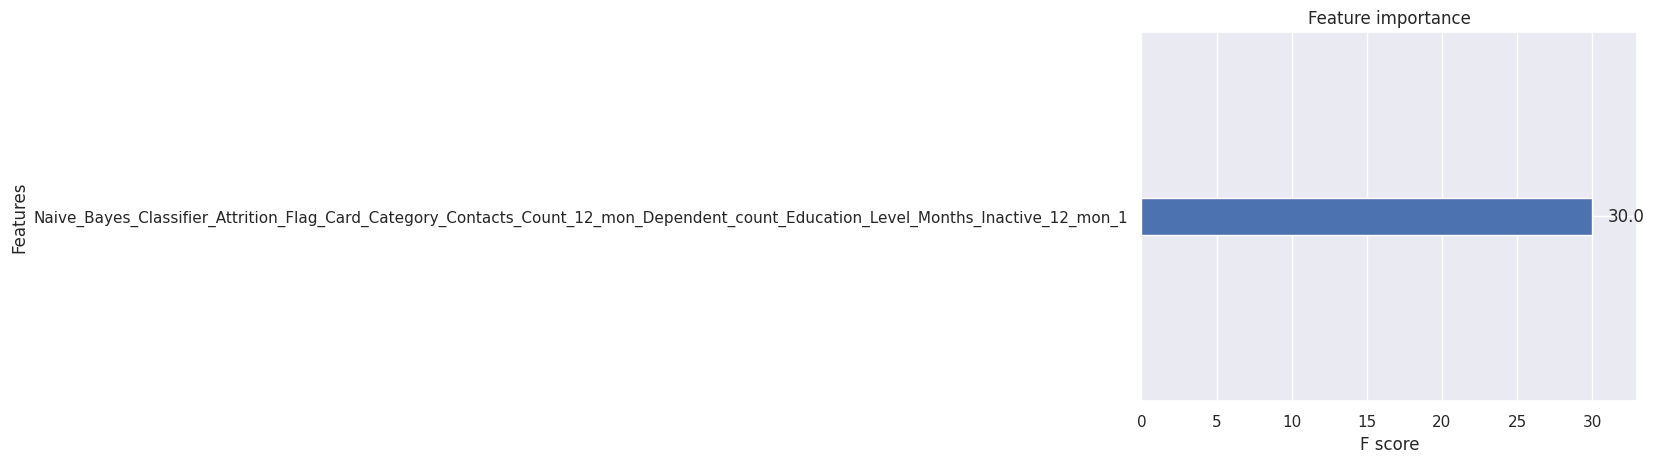

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)


In [ ]:
sel_cols = ['Edu_level1', 'Edu_level2', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt']


In [ ]:
x = train[sel_cols]
y = train.Attrition_Flag

x.head()

,Edu_level1,Edu_level2,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt
8886,-0.440059,0.440058,0.803482,-0.286549,1.206534
2347,-0.439276,0.439267,-0.937495,0.012268,-0.831185
8324,-0.439888,0.439895,0.378854,0.941466,0.121405
3543,-0.439875,0.439867,1.143185,0.503474,-0.061640
18,-0.439719,0.439731,-1.489512,1.743770,-0.905629


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       670

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



<Axes: >

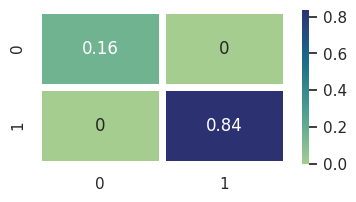

In [ ]:
#classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
train_pred = log_reg.predict(xtrain)
print(classification_report(train_pred, ytrain))

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00       168

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

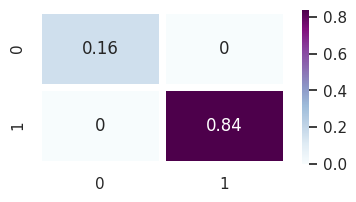

In [ ]:
#tryimg on the test data
test_pred = log_reg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer_ = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer_/np.sum(revealer_), annot = True, cmap = 'BuPu', linewidth = 5)

In [ ]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/BankTestData')
test_data.head(2)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Edu_level1,Edu_level2
0,2491,778724058,Existing Customer,63,M,0,Doctorate,Single,$40K - $60K,Blue,...,5905.0,726,5179.0,0.850,3982,65,0.857,0.123,0.000454,0.99955
1,4018,811095483,Existing Customer,48,F,4,Graduate,Married,$40K - $60K,Silver,...,21163.0,2517,18646.0,0.569,1732,35,0.458,0.119,0.000019,0.99998


In [ ]:
for i in test_data.columns:
    if test_data[i].dtypes == 'int' or test_data[i].dtypes == 'float':
        test_data[[i]] = scaler.fit_transform(test_data[[i]])

for i in test_data.columns:
    if test_data[i].dtypes == 'O':
        test_data[i] = lb.fit_transform(test_data[i])

test_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Edu_level1,Edu_level2
0,-0.855072,1.092294,1,2.173007,1,-1.972910,1,2,1,0,...,-0.295979,-0.346138,-0.269054,0.280260,-0.092562,0.051381,0.744885,-0.422772,-0.431571,0.431581
1,-0.329883,1.969990,1,0.145789,0,1.401630,2,1,1,2,...,1.349447,1.868841,1.201027,-0.971666,-0.838586,-1.262455,-1.176106,-0.438678,-0.432770,0.432767
2,-1.527121,-0.461484,0,-0.259654,1,-0.285640,2,1,2,0,...,-0.777670,-1.244001,-0.677395,-0.494954,-1.177778,-1.612811,-1.354243,-0.911858,2.316953,-2.316953
3,0.388254,1.373761,1,0.956676,1,0.557995,4,2,3,2,...,2.789439,1.832976,2.661828,-1.047405,0.046364,1.014860,0.354909,-0.625564,-0.432655,0.432657
4,-1.657129,-0.532356,1,-0.529950,0,1.401630,2,0,4,0,...,-0.588227,1.172563,-0.698933,0.819346,-0.986796,-1.525222,0.017893,1.521642,-0.432509,0.432519


In [ ]:
sel_cols = ['Edu_level1', 'Edu_level2', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt']
test_data_x = test_data[sel_cols]
test_data_y = test_data['Attrition_Flag']

In [ ]:
for i in test_data.columns:
    if test_data[i].dtypes == 'int' or test_data[i].dtypes == 'float':
        test_data[[i]] = scaler.fit_transform(test_data[[i]])

for i in test_data.columns:
    if test_data[i].dtypes == 'O':
        test_data[i] = lb.fit_transform(test_data[i])

test_data.head()


,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Edu_level1,Edu_level2
0,-0.855072,1.092294,0.432338,2.173007,1.090713,-1.972910,-1.208514,0.566659,-1.068257,-0.268387,...,-0.295979,-0.346138,-0.269054,0.280260,-0.092562,0.051381,0.744885,-0.422772,-0.431571,0.431581
1,-0.329883,1.969990,0.432338,0.145789,-0.916831,1.401630,-0.660367,-0.791184,-1.068257,3.992255,...,1.349447,1.868841,1.201027,-0.971666,-0.838586,-1.262455,-1.176106,-0.438678,-0.432770,0.432767
2,-1.527121,-0.461484,-2.313007,-0.259654,1.090713,-0.285640,-0.660367,-0.791184,-0.428311,-0.268387,...,-0.777670,-1.244001,-0.677395,-0.494954,-1.177778,-1.612811,-1.354243,-0.911858,2.316953,-2.316953
3,0.388254,1.373761,0.432338,0.956676,1.090713,0.557995,0.435928,0.566659,0.211636,3.992255,...,2.789439,1.832976,2.661828,-1.047405,0.046364,1.014860,0.354909,-0.625564,-0.432655,0.432657
4,-1.657129,-0.532356,0.432338,-0.529950,-0.916831,1.401630,-0.660367,-2.149026,0.851583,-0.268387,...,-0.588227,1.172563,-0.698933,0.819346,-0.986796,-1.525222,0.017893,1.521642,-0.432509,0.432519


In [ ]:
sel_cols = ['Edu_level1', 'Edu_level2', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt']
test_data_x = test_data[sel_cols]
test_data_y = test_data['Attrition_Flag']

In [ ]:
test_data_x

,Edu_level1,Edu_level2,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt
0,-0.431571,0.431581,0.051381,0.744885,-0.092562
1,-0.432770,0.432767,-1.262455,-1.176106,-0.838586
2,2.316953,-2.316953,-1.612811,-1.354243,-1.177778
3,-0.432655,0.432657,1.014860,0.354909,0.046364
4,-0.432509,0.432519,-1.525222,0.017893,-0.986796
...,...,...,...,...,...
122,-0.432370,0.432381,0.270354,0.913393,-0.231488
123,-0.432729,0.432740,0.489326,-1.628670,-0.068689
124,-0.432290,0.432298,1.759367,0.147885,3.144850
125,2.299192,-2.299192,0.007586,0.865248,1.201873


In [ ]:
new_pred = log_reg.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidths= 5)

ValueError: ignored

In [ ]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
